In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
df= pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')
df.shape

(11251, 15)

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [25]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [27]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [30]:
df.shape

(11239, 13)

In [31]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [32]:
df['Amount']= df['Amount'].astype('int')

In [33]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [34]:
df['Zone'].nunique()

5

## EDA 

#### Bar chart for Gender Count

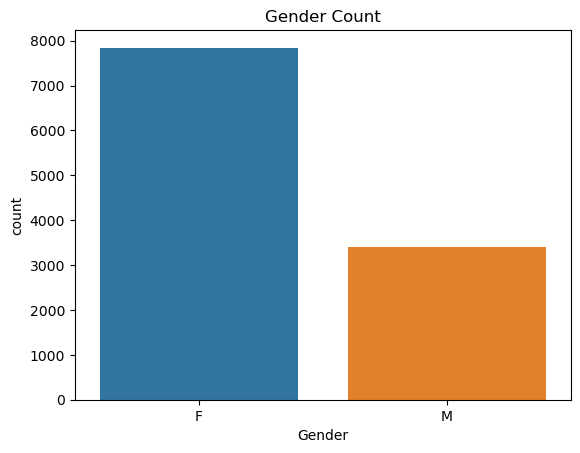

In [79]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.show()

#### Bar chart for Gender vs Total Amount

In [80]:
sales_gender= df.groupby('Gender')['Amount'].sum().reset_index().sort_values(by= 'Amount', ascending=False)
sales_gender

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


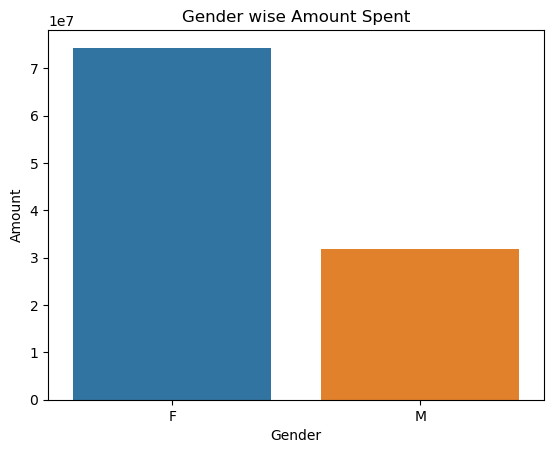

In [81]:
sns.barplot(x='Gender', y='Amount', data=sales_gender)
plt.title('Gender wise Amount Spent')
plt.show()

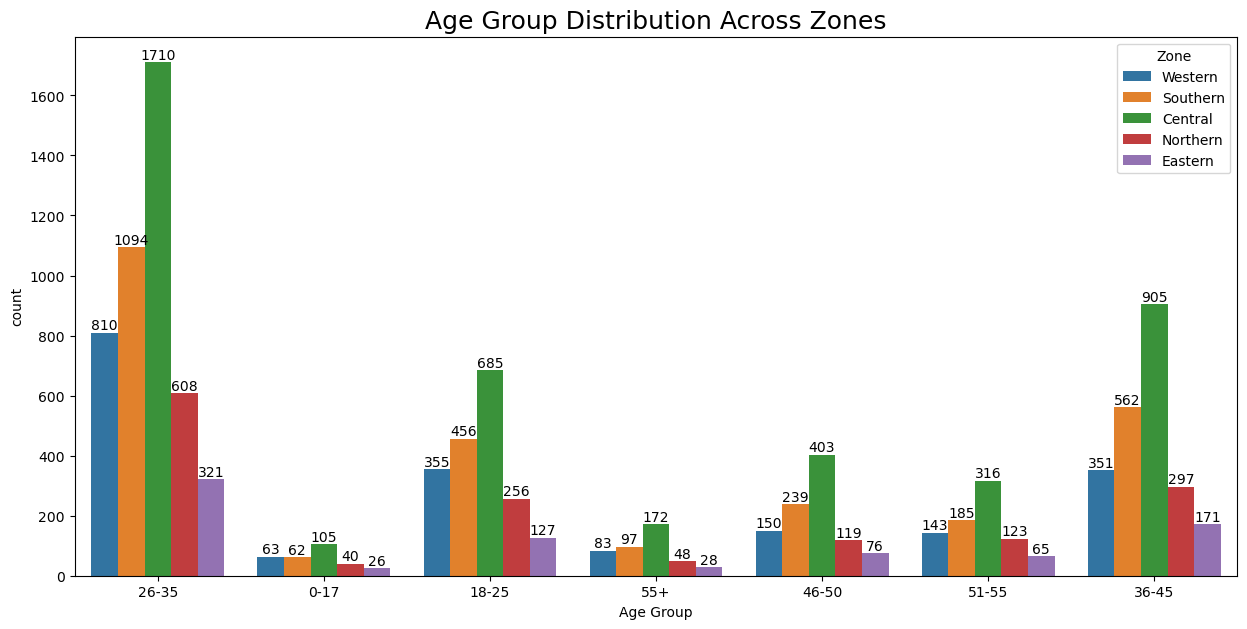

In [82]:
plt.figure(figsize=(15,7))
ax= sns.countplot(data=df, x='Age Group', hue='Zone')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Age Group Distribution Across Zones', fontsize=18)
plt.show()


#### Total Amount vs Age Group

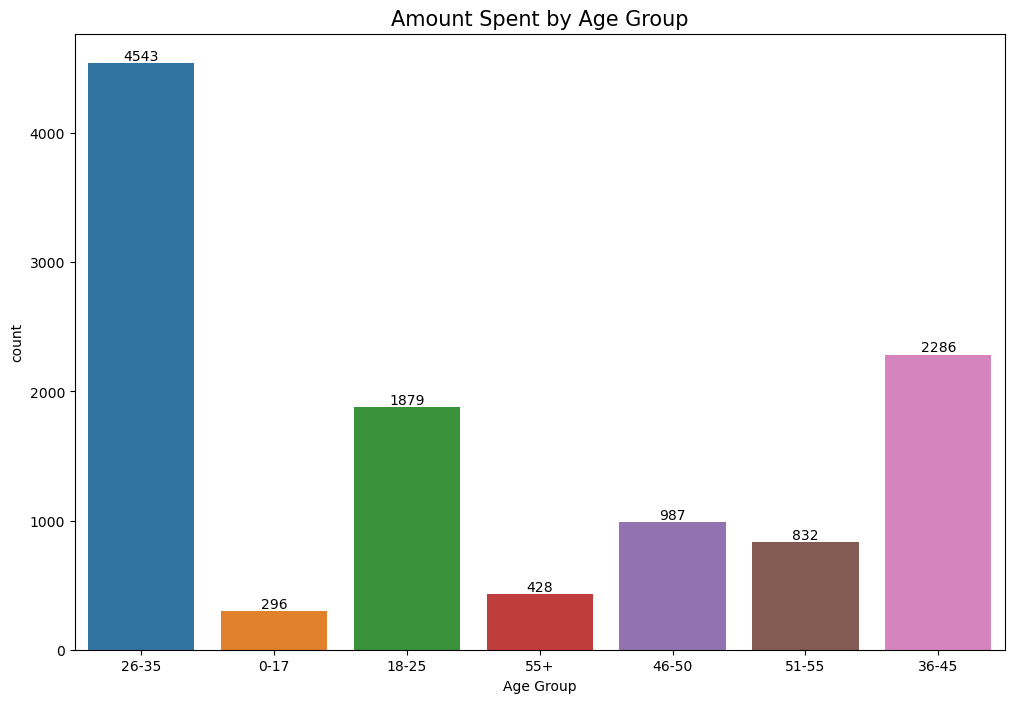

In [83]:
plt.figure(figsize=(12, 8))
ax= sns.countplot(data=df, x='Age Group')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Amount Spent by Age Group', fontsize=15)
plt.show()

In [84]:
Age_group_amt= df.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
Age_group_amt['Amount']= Age_group_amt['Amount']/1000000
Age_group_amt

,Age Group,Amount
2,26-35,42.613444
3,36-45,22.144995
1,18-25,17.240732
4,46-50,9.207844
5,51-55,8.261477
6,55+,4.080987
0,0-17,2.699653


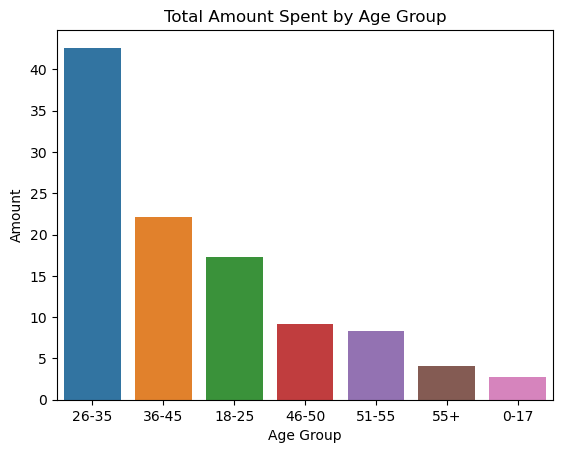

In [85]:
sns.barplot(data=Age_group_amt, x='Age Group', y='Amount')
plt.title('Total Amount Spent by Age Group')
plt.show()

### State Count

In [86]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [87]:
df['State'].value_counts()

Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [88]:
df['State'].nunique()

16

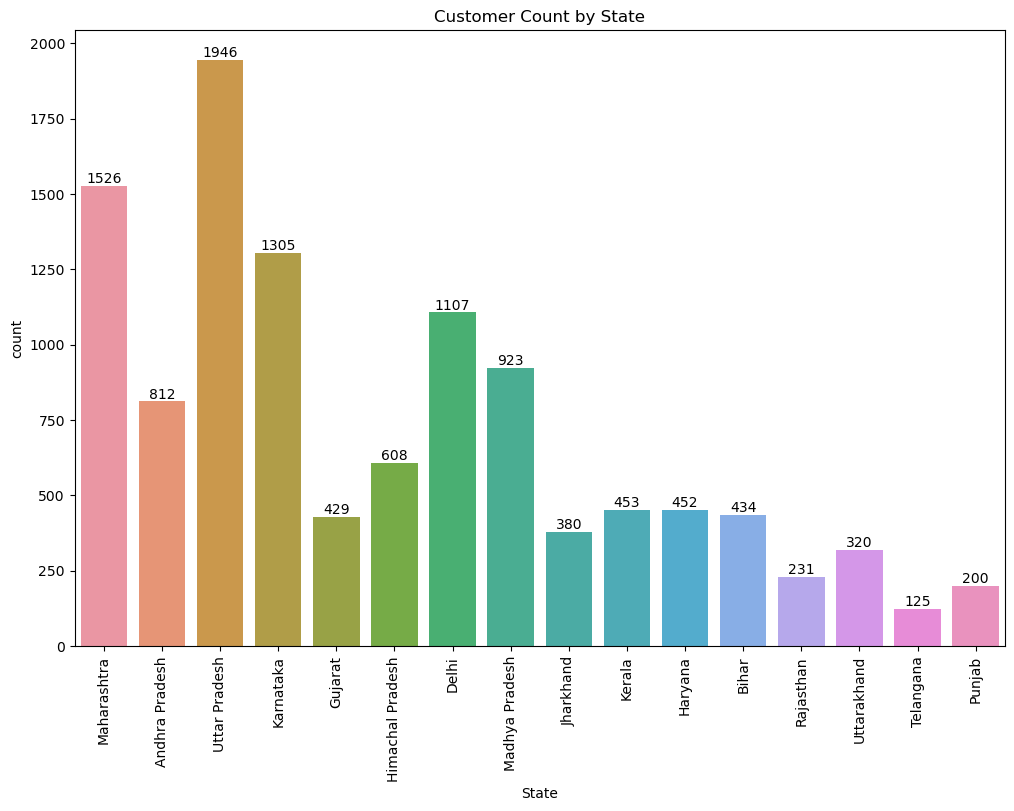

In [89]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='State')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title('Customer Count by State')
plt.show()

## Marital Status

In [90]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

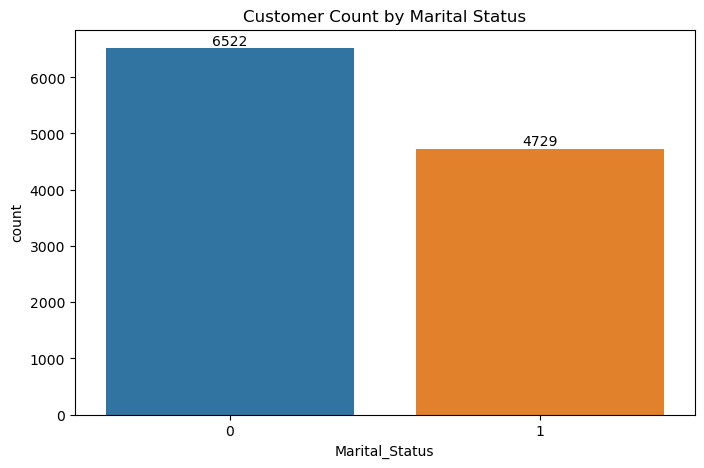

In [91]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=df, x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Count by Marital Status')
plt.show()

In [92]:
mar_gen= df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
mar_gen['Amount']= mar_gen['Amount']/1000000
mar_gen

,Marital_Status,Gender,Amount
0,0,F,43.786648
2,1,F,30.549208
1,0,M,18.338738
3,1,M,13.574538


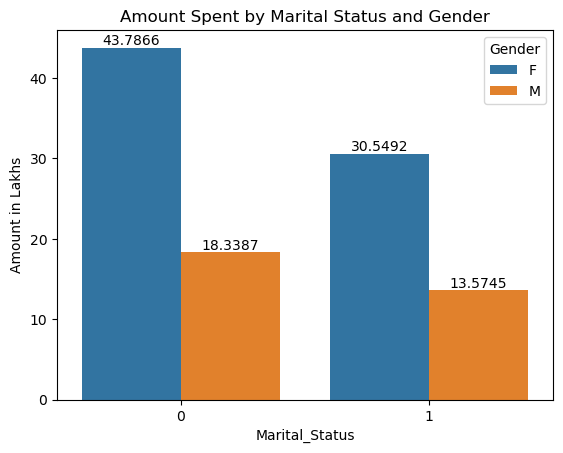

In [93]:
ax= sns.barplot(data=mar_gen, x='Marital_Status', y='Amount', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.ylabel('Amount in Lakhs')
plt.title('Amount Spent by Marital Status and Gender')
plt.show()

In [94]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [95]:
df['Occupation'].nunique()

15

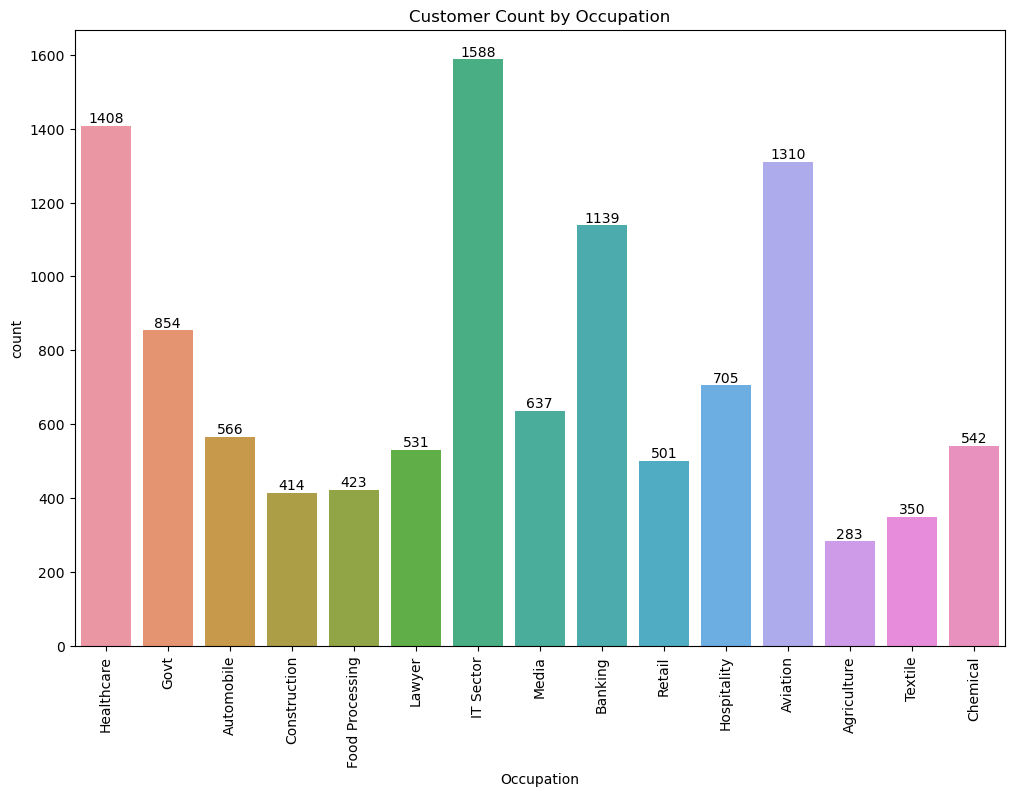

In [96]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Count by Occupation')
plt.xticks(rotation=90)
plt.show()

In [97]:
occ= df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
occ['Amount']= occ['Amount']/1000000
occ

,Occupation,Amount
10,IT Sector,14.755079
8,Healthcare,13.034587
2,Aviation,12.602298
3,Banking,10.770611
7,Govt,8.517212
9,Hospitality,6.376405
12,Media,6.295833
1,Automobile,5.368596
4,Chemical,5.297436
11,Lawyer,4.981665


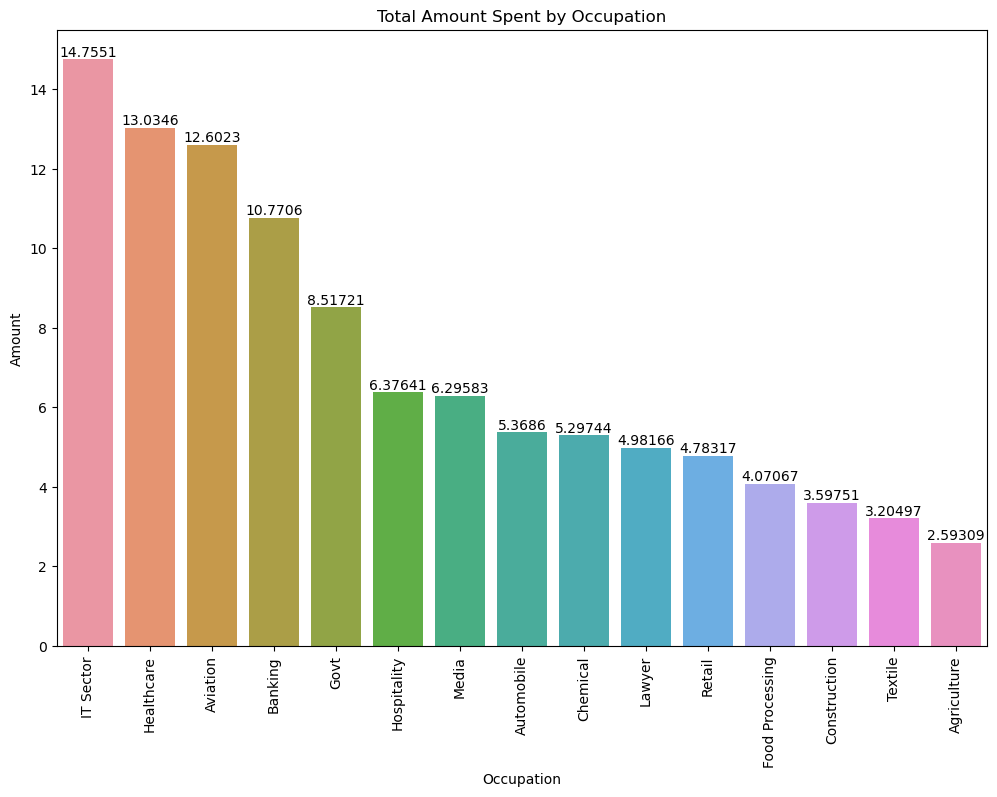

In [98]:
plt.figure(figsize=(12,8))
ax= sns.barplot(data=occ, x='Occupation', y='Amount')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Amount Spent by Occupation')
plt.xticks(rotation=90)
plt.show()

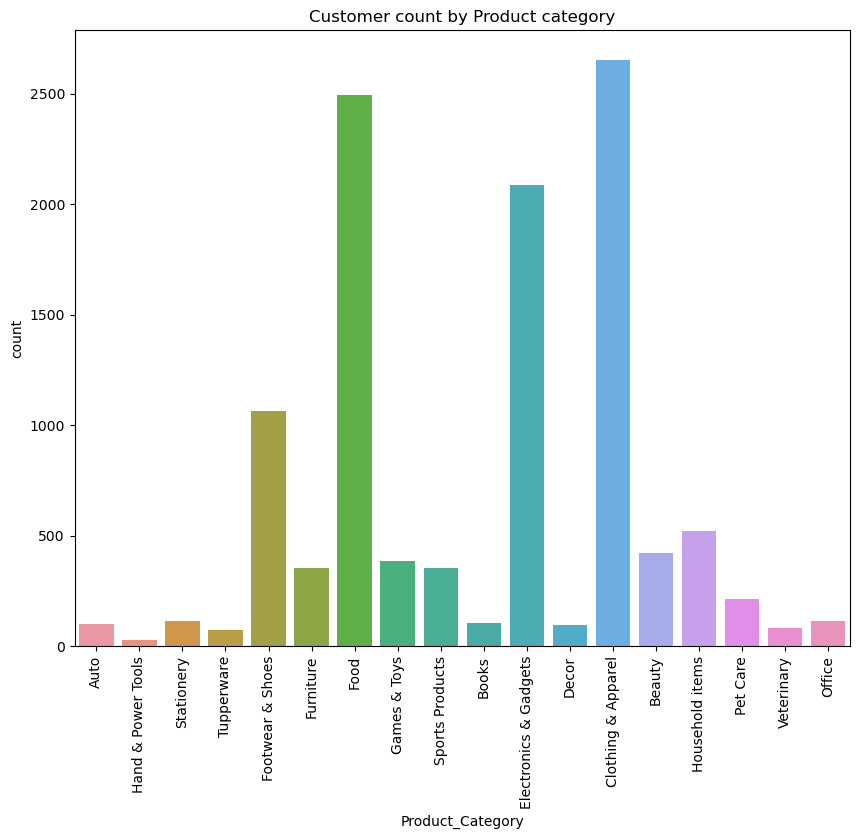

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Product_Category')
plt.title('Customer count by Product category')
plt.xticks(rotation=90)
plt.show()

In [100]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [104]:
prod_cat= df.groupby('Product_Category')[['User_ID']].count()
prod_cat

,User_ID
Product_Category,
Auto,100
Beauty,422
Books,103
Clothing & Apparel,2655
Decor,96
Electronics & Gadgets,2087
Food,2493
Footwear & Shoes,1064
Furniture,353


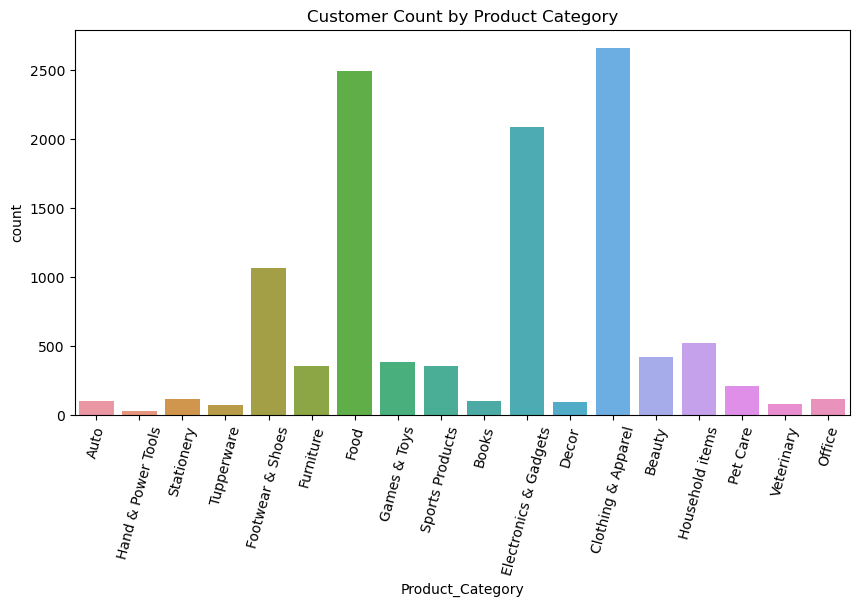

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=75)
plt.title('Customer Count by Product Category')
plt.show()